<a href="https://colab.research.google.com/github/m-asaadi/EventRegistration/blob/master/LabAsg1_MahdisAsaadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 1 objectives:


*   **Review Python & PyTorch** basics (week 1)
*   **Explore 2 WSIs** (loading the images, extract patches with different magnification levels, analyze the patches and understand the challenges related to dealing with pathology data)

**Deadline for Moodle submission**: Sunday, february 11th, 2024 (11:59PM). Please paste the shared link of this Google Colab in your lab report. Please submit your lab report as a PDF as well as the notebook (`.ipynb`).

## TIAToolBox introduction & installation
In this course, we will work with TIAToolbox, a computational pathology toolbox developed by TIA Centre (University of Warwick). Based on PyTorch, this tool provides a complete toolbox for pathology image analysis. The documentation is available on their [GitHub](https://github.com/TissueImageAnalytics/tiatoolbox/tree/develop) and on their [Documentation website](https://tia-toolbox.readthedocs.io/en/latest/installation.html)


### Setting up the environment

In [7]:
%%bash
apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools libpixman-1-dev | tail -n 1
pip install git+https://github.com/TissueImageAnalytics/tiatoolbox.git@develop | tail -n 1
echo "Installation is done."

# now you have to restart the runtime before going further (necessary to load the last version of prerequisitie packages installed with TIATool)

# to remove leftovers from previous runs
rm -rf tmp
echo "deleting tmp directory"


Installation is done.
deleting tmp directory


  Running command git clone --filter=blob:none --quiet https://github.com/TissueImageAnalytics/tiatoolbox.git /tmp/pip-req-build-8p7jvf36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.19.2 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.0 which is incompatible.
notebook 6.5.5 requires pyzmq<25,>=17, but you have pyzmq 25.1.2 which is incompatible.


In [8]:
"""Import modules required to run the Jupyter notebook."""
# Clear logger to use tiatoolbox.logger
import logging
import numpy as np

if logging.getLogger().hasHandlers():
    logging.getLogger().handlers.clear()

# Pretty print for nice dictionary printing
from pprint import pprint

import matplotlib as mpl
import matplotlib.pyplot as plt

from tiatoolbox import logger
from tiatoolbox.data import small_svs
from tiatoolbox.wsicore.wsireader import WSIReader

mpl.rcParams["figure.dpi"] = 150  # for high resolution figure in notebook
mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode
plt.rcParams.update({"font.size": 5})

|2024-01-26|21:33:36.649| [INFO] NumExpr defaulting to 2 threads.


### Data loading
In this lab, you will study 2 Whole Slide Images (WSIs) which come from 2 different datasets. The first one comes from a private dataset of a hospital in Ontario and the second one comes from [Camelyon16](https://camelyon16.grand-challenge.org)

In [10]:
#mount drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## WSI exploration

In [11]:
# download the slides

# reader = WSIReader.open(My Drive/CPathTutorials/CPathLab1/Breast WSI)

file_path = small_svs()
logger.info(file_path)




|2024-01-26|21:35:58.973| [INFO] /tmp/CMU-1-Small-Region.svs


### Question 1: WSI meta-data and pyramid

In [13]:
# write code here to display all the information using TIAToolbox WSIreader

from tiatoolbox.wsicore.wsireader import WSIReader
stomachWSI = WSIReader.open(input_img="/content/drive/MyDrive/Colab Notebooks/Stomach.svs")

#print(stomachWSI.info.relative_level_scales(0.5, "baseline"))

stomachWSIinfo = stomachWSI.info.as_dict()

print (stomachWSI)
print(*list(stomachWSIinfo.items()), sep="\n")  # noqa: T201


# reader = WSIReader.open(file_path)
# print(reader)

('objective_power', 20.0)
('slide_dimensions', (22001, 17913))
('level_count', 3)
('level_dimensions', ((22001, 17913), (5500, 4478), (2750, 2239)))
('level_downsamples', [1.0, 4.000202566080636, 8.000405132161273])
('vendor', 'aperio')
('mpp', (0.5015, 0.5015))
('file_path', PosixPath('/content/drive/MyDrive/Colab Notebooks/Stomach.svs'))
('axes', 'YXS')


### Question 2: display a thumbnail of the images

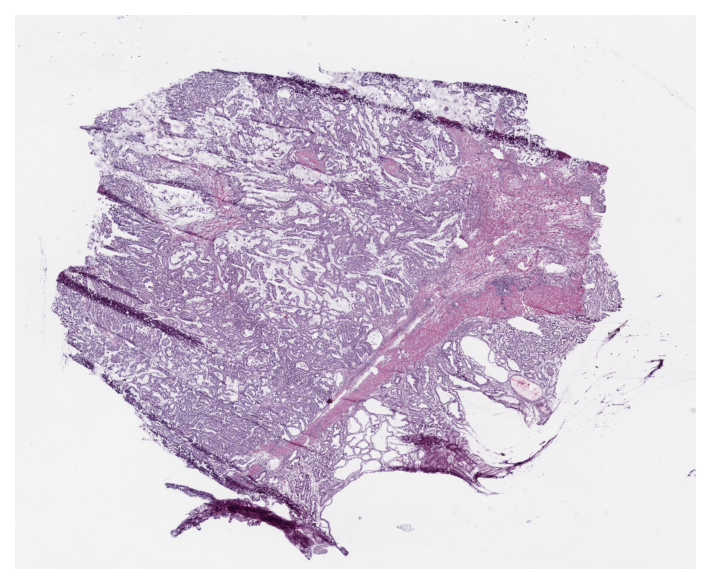

In [14]:
# write code here to display the image using the thumbnail tool of TIAToolbox

thumbnail = stomachWSI.slide_thumbnail(resolution=1.25, units="power")
plt.imshow(thumbnail)
plt.axis("off")
plt.show()

## Tissue masking and patch extraction

In this part, you have to work on the WSI from **stomach**.

### Question 3: display the tissue mask of the WSI at level 1

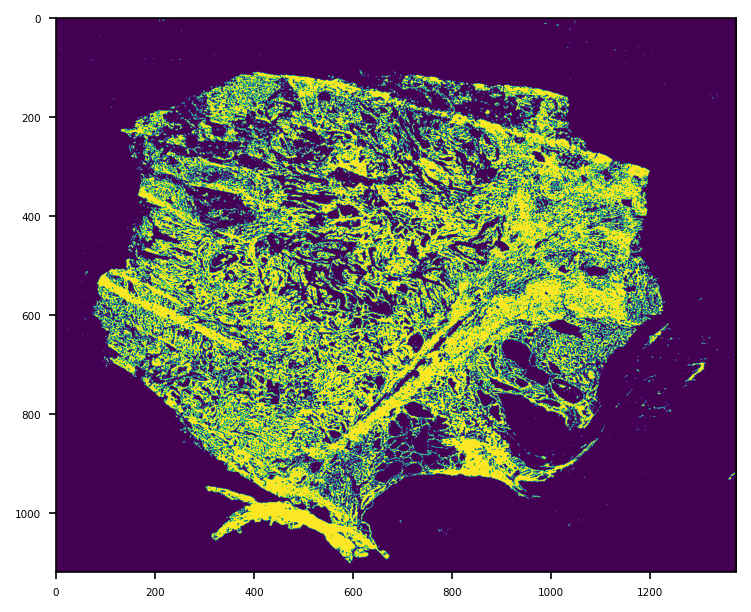

In [15]:
# write code here to apply tissue masking on the stomach slide

mask_reader = stomachWSI.tissue_mask(resolution=4, units="mpp")
mask_thumbnail = mask_reader.slide_thumbnail(resolution=1.25, units="power")

plt.imshow(mask_thumbnail)
plt.show()

### Question 4: patch extraction and background removal

In [16]:
# result should be of type
PATCH_SIZE = #
OVERLAP = #
LEVEL = #

# write code here to extract patches using TIAToolbox

patch_extractor = patchextraction.get_patch_extractor(
    input_img=file_path,  # input image path, numpy array, or WSI object
    locations_list=np.array(centroids_list)[
        500:600,
        :,
    ],  # path to list of points (csv, json), numpy list, panda DF
    method_name="point",  # also supports "slidingwindow"
    patch_size=(
        32,
        32,
    ),  # size of the patch to extract around the centroids from centroids_list
    resolution=0,
    units="level",
)


SyntaxError: invalid syntax (<ipython-input-16-a00ea0b87b04>, line 2)

In [ ]:
# write code here to display some patches for both levels

### Question 5 : save only tissue patches

There is not a unique way to proceed! It is an open-question! You should reshape them to 100x100 so they occupy less space in memory!

## Using the Regions of Interest (ROI) annotations

The annotations have been made using [SlideVault tools](https://slidevault.hurondigitalpathology.com/#/) and have been extracted under XML files [here](https://drive.google.com/drive/folders/10ny1-0LSftxEMKDe58JFRXxrPA718IQR?usp=sharing)
Please note that there is a disrepancy between SlideVault axes and TIAToolbox axes. If SlideVault origin is located at the bottom left corner, TIAToolbox origin is the top left corner. Therefore, you may run the following code `manage_coordinates` on the coordinates of the annotations to adapt the X coordinates.

In [ ]:
def manage_coordinates(all_coordinates, slide):
  info_slide = slide.info.as_dict()
  h = info_slide['slide_dimensions'][1]
  for k in range(all_coordinates.shape[0]):
      all_coordinates[k][1],all_coordinates[k][3]=h-all_coordinates[k][1],h-all_coordinates[k][3]
  return all_coordinates

### Question 6: extract patches from the ROIs of the 5 WSIs

For this question, you are highly encouraged to use `shapely`, a Python module to handle manipulation and analysis of geometric objects.

In [ ]:
from shapely.geometry import Point, Polygon

# write code here

### Question 7: display some patches to highlight the different tissues

### Question 8: analysis in the RGB space

For questions 8 and 9, you have to use the **pancreatic patches** you extracted in question 6.

You have to treat each patch as a RGB datapoint : for each patch, extract the mean over the 3 channels and plot 3 histograms as well as 3-D scatter plot for these
values across all patches

In [ ]:
# write code here to analyze the colours of the patches in the RGB space

### Question 9: projection the patches to HSV and LaB space and display some examples. Repeat question 8 in the Lab space.

Project the pancreas patches to the Lab colour space

Project the pancreas patches to the HSV colour space and repeat question 8

### Question 10: Focus Quality Assessment check

Using a Laplacian filter on the skin WSI, provide a visual representation/color heatmap for out-of-focus quality for this WSI.

In [ ]:
# this is an open question and we will take into account all the steps you take